In [1]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist

from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)
import pandas as pd
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout

import warnings
warnings.simplefilter(action='ignore')

In [2]:
!which jupyter

/home/daria/anaconda3/envs/nn_project/bin/jupyter


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

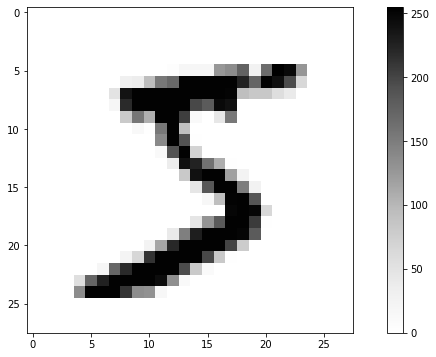

In [3]:
# Show the first image, pixels range from 0 to 255
plt.imshow(X_train[0], cmap=plt.cm.Greys);
plt.colorbar()

In [4]:
# Show the first y value
y_train[0]

5

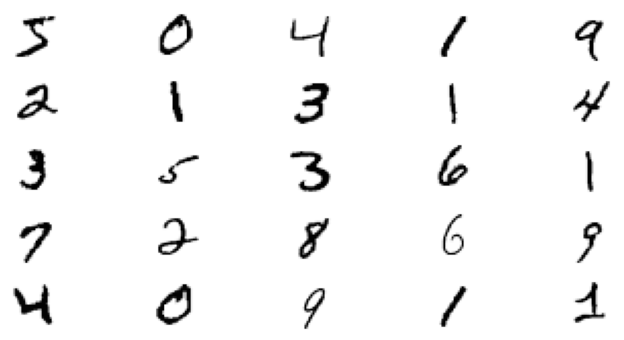

In [5]:
# Plot the first 25 digits
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [6]:
# Inspect the shape of X
X_train.shape

#What do the dimensions represent?

#60,000 images
#each image has 28 rows (height)
#each image has 28 columns (width)

(60000, 28, 28)

In [7]:
# Can we work with X as it is?
#twe need a single vector for each training example, 
#so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.
X_train = X_train.reshape(60000, 784)
X_test=X_test.reshape(10000,784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
pd.DataFrame(X_train)
#each image has 784 features
#each pixel is an independent features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Inspect the shape of y
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# one-hot-encode y; final layer will have 10 neurons
y_train = to_categorical(y_train, num_classes=10) 
y_test = to_categorical(y_test, num_classes=10) 

In [11]:
# Define the model
m = Sequential([
    Dense(units = 200, activation = 'relu', input_shape=(784,)), # Hidden layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'),        
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=10, activation='softmax') # Output layer
  
    
])

# For Dense layers in Keras, biases are added automatically for each neuron in the layer. We do not 
# need to add the biases manually.

In [12]:
# view all layers and the number of parameters
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

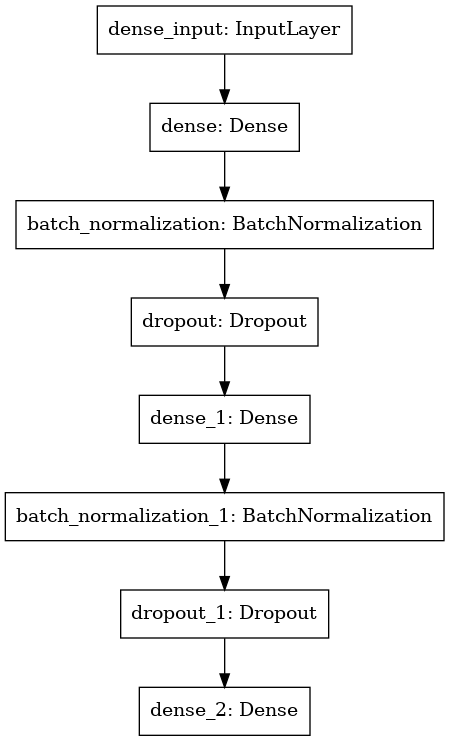

In [13]:
# To get this running you need to pip install pydot and install graphviz (not a pip installation)

from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
   #to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

In [14]:
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
##compiling the model basically translates our keras code into lower-level TensorFlow / C++

#categorical_crossentropy
# optimizer: algorithm that finds the minimum of the loss function
# loss: the loss function to be optimized; we choose the loss function depending on the 
# problem we are solving
# metrics: metrics to be tracked over training

In [15]:
history = m.fit(X_train, y_train, batch_size=500, epochs=35, validation_data=(X_test, y_test))
#callbacks=[callback]
#You would usually want to set the number of epochs as low as possible, but the mini-batch-size as high as possible.
# batch_size: In Deep Learning you usually don't train your model on the whole dataset at once
# The batch_size determines how many data points you train on at once before going on to the next batch
# epochs: How often do we repeat the training on the whole training data; similar to max_iter in an sklearn model
# validation_split: Determines which fraction of the data is used as a validation set

Epoch 1/35
120/120 [==============================] - 4s 24ms/step - loss: 0.8548 - accuracy: 0.7376 - val_loss: 0.2588 - val_accuracy: 0.9202
Epoch 2/35
120/120 [==============================] - 3s 24ms/step - loss: 0.3906 - accuracy: 0.8881 - val_loss: 0.1858 - val_accuracy: 0.9406
Epoch 3/35
120/120 [==============================] - 2s 20ms/step - loss: 0.2992 - accuracy: 0.9142 - val_loss: 0.1545 - val_accuracy: 0.9504
Epoch 4/35
120/120 [==============================] - 2s 18ms/step - loss: 0.2526 - accuracy: 0.9292 - val_loss: 0.1343 - val_accuracy: 0.9576
Epoch 5/35
120/120 [==============================] - 2s 18ms/step - loss: 0.2220 - accuracy: 0.9364 - val_loss: 0.1219 - val_accuracy: 0.9624
Epoch 6/35
120/120 [==============================] - 2s 20ms/step - loss: 0.1983 - accuracy: 0.9435 - val_loss: 0.1159 - val_accuracy: 0.9653
Epoch 7/35
120/120 [==============================] - 2s 19ms/step - loss: 0.1837 - accuracy: 0.9469 - val_loss: 0.1040 - val_accuracy: 0.9672

In [16]:
#40 D-B 0.5
train_loss, train_acc = m.evaluate(X_train, y_train)
test_loss, test_acc = m.evaluate(X_test, y_test)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9799
Train accuracy: 0.99493
Train loss: 0
Test accuracy: 0.9799
Test loss: 0.075


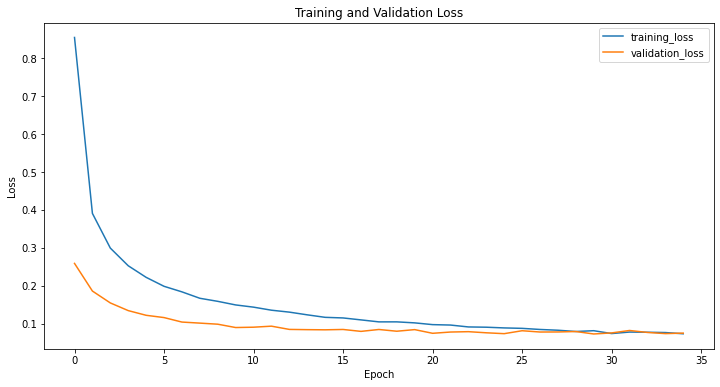

In [17]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

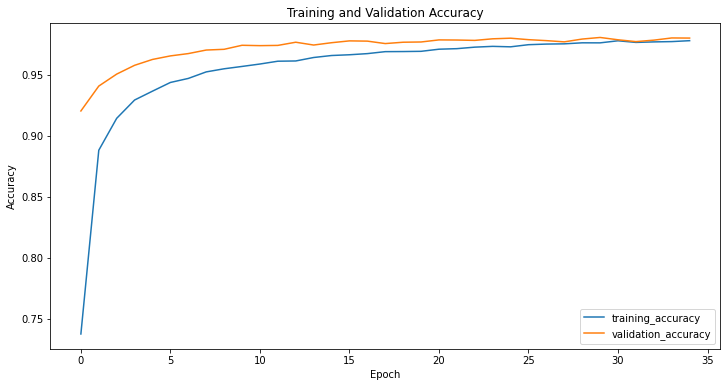

In [18]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predictions

In [19]:
# Look at the first 10 predictions
predicted_classes=m.predict_classes(X_test)
y_test=np.argmax(y_test,axis = 1)

In [20]:
predicted_classes[0],y_test[0]

(7, 7)

In [21]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [22]:
len(np.nonzero(predicted_classes != y_test)[0]),len(np.nonzero(predicted_classes == y_test)[0])

(201, 9799)

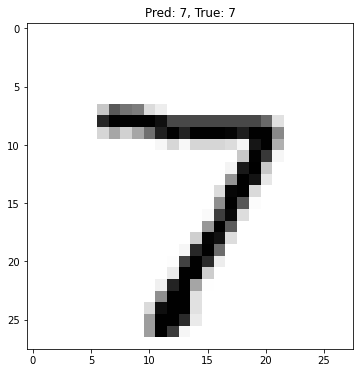

In [23]:
#first pred and true
plt.imshow(X_test[0].reshape(28,28),cmap=plt.cm.Greys)
plt.title("Pred: {}, True: {}".format(predicted_classes[0], y_test[0]));

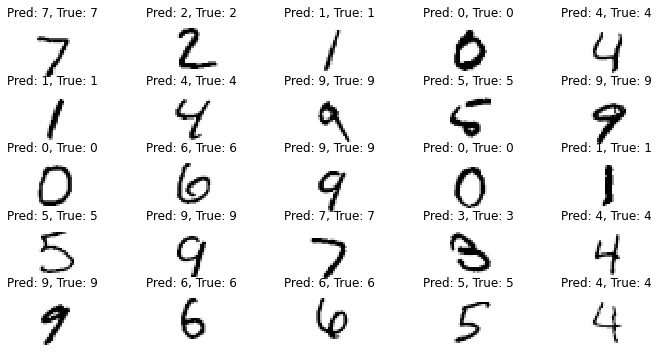

In [24]:
plt.figure()
for i, correct in enumerate(correct_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap=plt.cm.Greys, interpolation='none')
    plt.axis('off')
    plt.title("Pred: {}, True: {}".format(predicted_classes[correct], y_test[correct]))

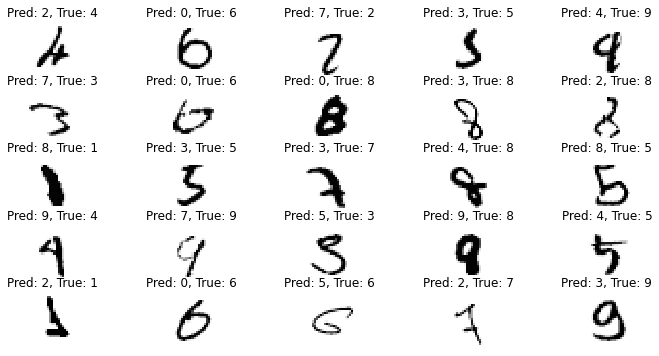

In [25]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap=plt.cm.Greys, interpolation='none')
    plt.axis('off')
    plt.title("Pred: {}, True: {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [277]:
confusion_matrix(y_test,predicted_classes)

array([[ 970,    1,    0,    2,    0,    0,    2,    3,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    1,    1,    2,    0],
       [   1,    1, 1020,    1,    1,    0,    1,    4,    3,    0],
       [   0,    0,    4,  991,    0,    2,    0,    6,    3,    4],
       [   0,    0,    3,    0,  961,    0,    3,    1,    2,   12],
       [   2,    0,    0,    8,    1,  868,    4,    2,    3,    4],
       [   5,    3,    1,    0,    4,    4,  940,    0,    1,    0],
       [   2,    6,   12,    2,    0,    0,    0, 1002,    0,    4],
       [   4,    1,    3,    5,    3,    5,    2,    6,  941,    4],
       [   1,    2,    0,    5,    9,    2,    0,    2,    3,  985]])